# Business Understanding

## Project Domain

- Domain : Lung Cancer Prediction

Kanker paru-paru adalah penyebab utama kematian akibat kanker di seluruh dunia, terhitung 1,59 juta kematian pada tahun 2018.Mayoritas kasus kanker paru disebabkan oleh kebiasaan merokok, tetapi paparan polusi udara juga merupakan faktor risiko. Sebuah studi baru telah menemukan bahwa polusi udara dapat dikaitkan dengan peningkatan risiko kanker paru-paru, bahkan pada orang yang bukan perokok.

Studi yang dipublikasikan dalam jurnal Nature Medicine ini mengamati data lebih dari 462.000 orang di Cina yang diikuti selama rata-rata enam tahun. Para peserta dibagi menjadi dua kelompok: mereka yang tinggal di daerah dengan tingkat polusi udara yang tinggi dan mereka yang tinggal di daerah dengan tingkat polusi udara yang rendah.

Para peneliti menemukan bahwa orang-orang dalam kelompok polusi tinggi lebih mungkin terkena kanker paru-paru daripada mereka yang berada dalam kelompok polusi rendah. Mereka juga menemukan bahwa risikonya lebih tinggi pada orang yang bukan perokok daripada perokok, dan risikonya meningkat seiring bertambahnya usia.

Meskipun penelitian ini tidak membuktikan bahwa polusi udara menyebabkan kanker paru-paru, namun penelitian ini menunjukkan bahwa mungkin ada hubungan antara keduanya. Penelitian lebih lanjut diperlukan untuk mengkonfirmasi temuan ini dan untuk menentukan apa pengaruh berbagai jenis dan tingkat polusi udara terhadap risiko kanker paru-paru.

## Problem Statements

Masalah yang Dihadapi :
- Kanker paru-paru sering terdeteksi saat sudah mencapai stadium lanjut, sehingga memperkecil peluang pemulihan.

- Masyarakat awam sulit mengenali faktor risiko secara mandiri.

- Belum tersedia alat bantu prediksi yang sederhana dan mudah digunakan untuk skrining awal risiko kanker paru-paru.

## Goals

- Mengembangkan sistem prediksi tingkat risiko kanker paru-paru (Low, Medium, High).

- Menyediakan antarmuka interaktif berbasis web yang dapat digunakan oleh masyarakat umum.

- Menyediakan hasil yang cepat, intuitif, dan informatif untuk membantu pengguna mengenali risikonya.

## Solution Statements

- Membuat model klasifikasi menggunakan machine learning berbasis TensorFlow dan TFLite.

- Membangun antarmuka pengguna menggunakan Streamlit dengan input interaktif dan hasil yang mudah dipahami.

- Menggunakan dataset historis dengan fitur gaya hidup dan kesehatan untuk pelatihan model, seperti usia, kebiasaan merokok, riwayat keluarga, dsb.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"broraps","key":"102335e16f634a996b18a6504784564e"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d thedevastator/cancer-patients-and-air-pollution-a-new-link

Dataset URL: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link
License(s): other
  0% 0.00/7.36k [00:00<?, ?B/s]
100% 7.36k/7.36k [00:00<00:00, 31.8MB/s]


In [4]:
!mkdir cancer-patients-and-air-pollution-a-new-link
!unzip cancer-patients-and-air-pollution-a-new-link.zip -d cancer-patients-and-air-pollution-a-new-link
!ls cancer-patients-and-air-pollution-a-new-link

Archive:  cancer-patients-and-air-pollution-a-new-link.zip
  inflating: cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv  
'cancer patient data sets.csv'


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report

## Exploratory Data Analysis

In [6]:
raw_data = pd.read_csv('/content/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv')
raw_data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [8]:
raw_data.isnull().any()

,0
index,False
Patient Id,False
Age,False
Gender,False
Air Pollution,False
Alcohol use,False
Dust Allergy,False
OccuPational Hazards,False
Genetic Risk,False
chronic Lung Disease,False


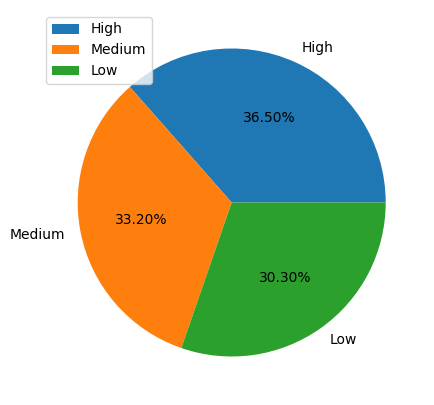

In [9]:
level_counts = raw_data['Level'].value_counts().reset_index()

plt.figure(figsize=(15, 5))
plt.pie(x = level_counts['count'], labels = level_counts['Level'], autopct = '%.2f%%')
plt.legend(level_counts['Level'])
plt.show()

Dataset ini terbagi hampir rata dengan masing masing tingkat resiko kanker paru paru untuk Low = 30,30%, Medium = 33,20% dan high = 36,50%. Dengan begitu dalam dataset ini akan lebih banyak data dengan resiko kanker paru paru High

<Axes: xlabel='Swallowing Difficulty', ylabel='Alcohol use'>

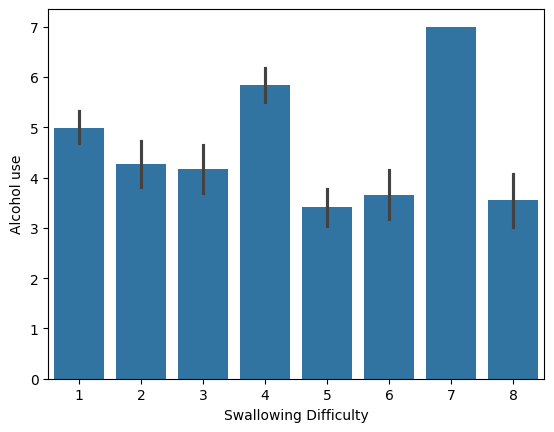

In [10]:
sns.barplot(y='Alcohol use', x ='Swallowing Difficulty', data=raw_data)

Data menunjukkan bahwa semakin banyak mengkonsumsi Alkohol akan semakin kesulitan untuk menelan

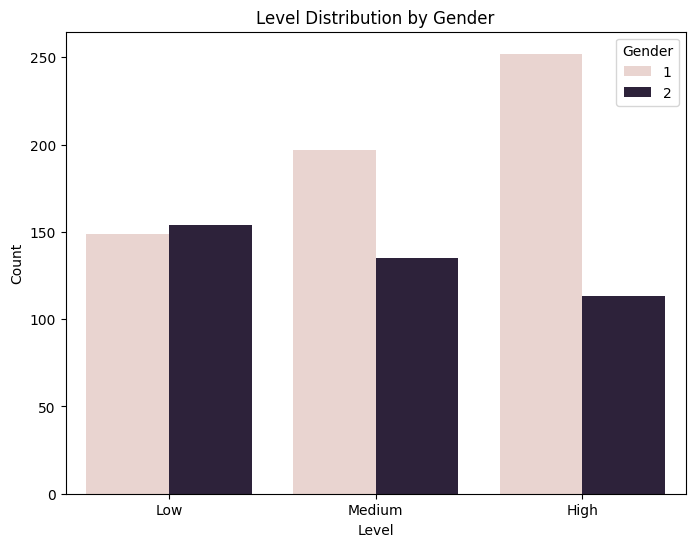

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Level', hue='Gender', data=raw_data)
plt.title('Level Distribution by Gender')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()


Dataset ini menunjukan bahwa wanita di setiap tingkatan resiko kanker paru paru lebih tinggi kecuali Low, data membuktikan bahwa wantia lebih beresiko terkena kanker paru paru

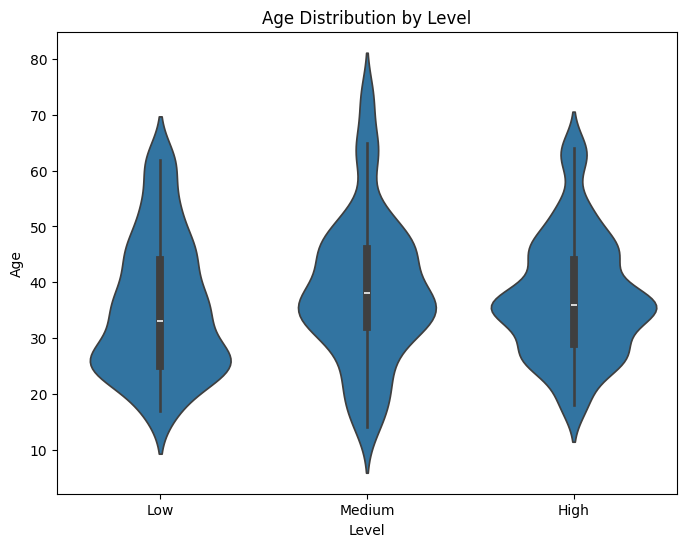

In [12]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Level', y='Age', data=raw_data)
plt.title('Age Distribution by Level')
plt.xlabel('Level')
plt.ylabel('Age')
plt.show()


Data Menunjukan bahwa :
- Data Level Low = Banyak umur pada rentang 20 dan 30
- Data Level Medium = Banyak umur pada rentang 30 dan 40
- Data Level High = Banyak umur pada rentang 30 dan 40, menunjukan bahwa umur tersebut memiliki tingkat resiko yang tinggi


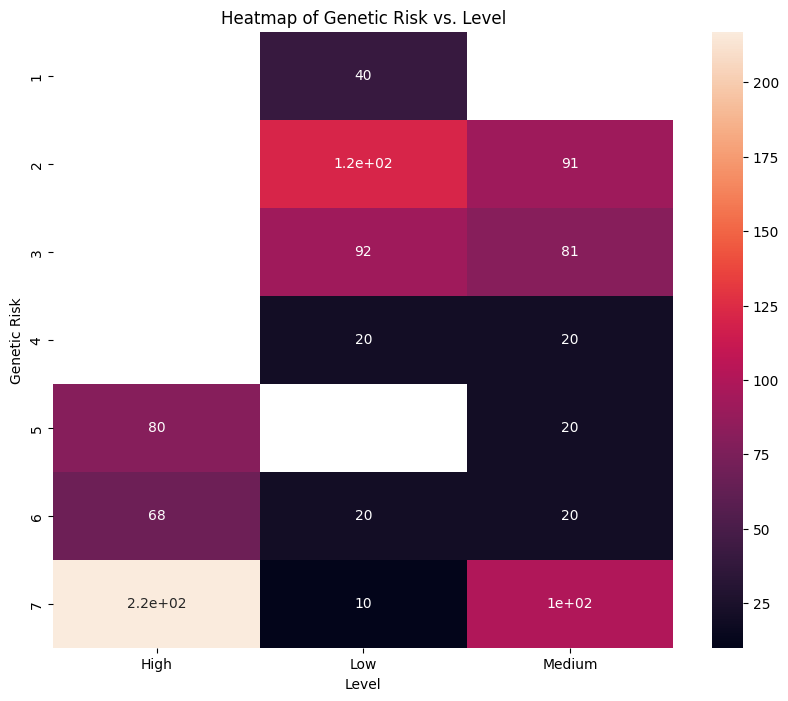

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(pd.pivot_table(raw_data, values='Age', index='Genetic Risk', columns='Level', aggfunc='count'), annot=True)
plt.title('Heatmap of Genetic Risk vs. Level')
plt.xlabel('Level')
plt.ylabel('Genetic Risk')
plt.show()

Pada data heatmap ini menunjukan bahwa, jika memiliki keturunan terkena kanker paru paru akan semakin meningkat resiko pada orang keturunannya

# Data Preparation

In [14]:
data = raw_data.copy()

In [15]:
data = data.drop(columns=['index', 'Patient Id'])

In [16]:
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [17]:
X= data.drop(columns=['Level'])
y= data['Level']

In [18]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

# Modeling

In [21]:

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax')) # Output layer with softmax for multi-class

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,507 (52.76 KB)

 Trainable params: 13,507 (52.76 KB)

 Non-trainable params: 0 (0.00 B)

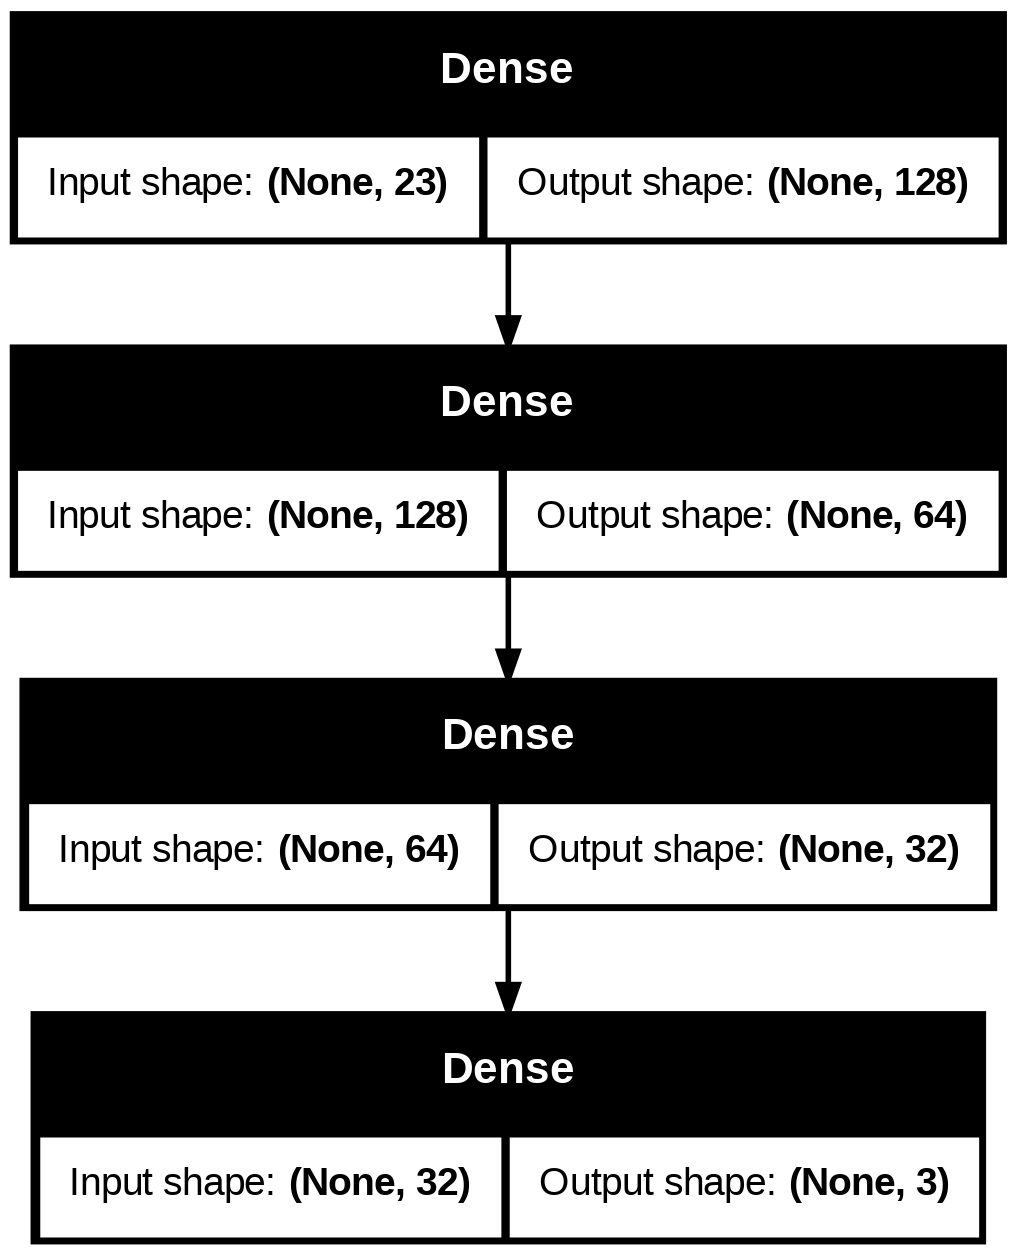

In [23]:
plot_model(model, show_shapes = True)

In [24]:
print(X_train.shape)
print(y_train.shape)

(800, 23)
(800,)


In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5675 - loss: 0.9840 - val_accuracy: 0.8250 - val_loss: 0.6528
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8377 - loss: 0.5450 - val_accuracy: 0.9250 - val_loss: 0.3130
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9288 - loss: 0.2774 - val_accuracy: 0.9688 - val_loss: 0.1764
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9752 - loss: 0.1348 - val_accuracy: 0.9937 - val_loss: 0.1228
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0844 - val_accuracy: 1.0000 - val_loss: 0.0532
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0417 - val_accuracy: 1.0000 - val_loss: 0.0286
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0244 - val_accuracy: 1.0000 - val_loss: 0.0168
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0135 - val_accuracy: 1.0000 - val_loss:

# Evaluation

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.8757e-05  
Akurasi Model: 1.0000
Loss Model: 0.0000


In [27]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

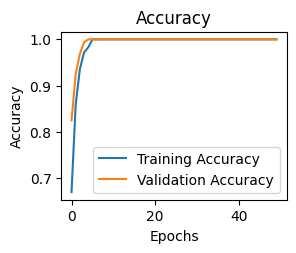

In [28]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

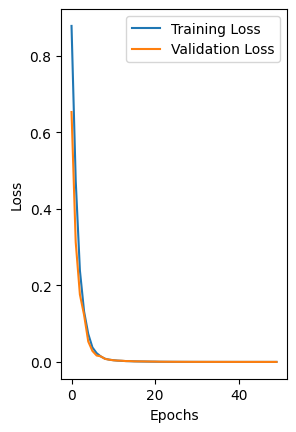

In [29]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


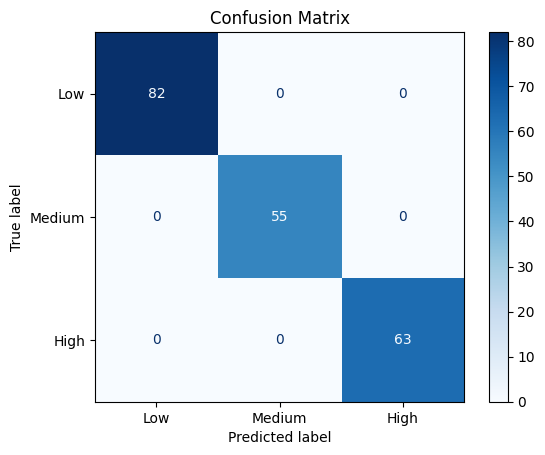

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        82
      Medium       1.00      1.00      1.00        55
        High       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [30]:
# Prediksi data testing
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Ubah probabilitas ke label

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Low', 'Medium', 'High']  # Ganti sesuai urutan label Anda

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

# Deployment

## Model Simulation

In [31]:
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [32]:
sample_input = np.array([[33, 1 ,2, 4, 5, 4, 3, 2, 2, 4, 3, 2, 2, 4, 3, 4, 2, 2, 4, 3, 4, 2, 1]])
sample_input_df = pd.DataFrame(sample_input)

In [33]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [34]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_crop = le.inverse_transform([predicted_class])
print(f"Resiko Terkena Kanker Paru Paru: {predicted_crop[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Resiko Terkena Kanker Paru Paru: Low


## Save Model

In [35]:
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [36]:
model.save('./lung.h5')

In [37]:
model = tf.keras.models.load_model('./lung.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open('lung_prediction.tflite', 'wb').write(tflite_model)

Saved artifact at '/tmp/tmp0u_z_x46'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 23), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  136141991657936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136139392504976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136139392505360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136139392506128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136139392505936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136139392505168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136139392507472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136139392507088: TensorSpec(shape=(), dtype=tf.resource, name=None)


19712